In [44]:

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score 


In [45]:
dta = sm.datasets.fair.load_pandas().data

In [46]:
dta.head()
dta['affair'] = (dta.affairs >
0).astype(int)
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


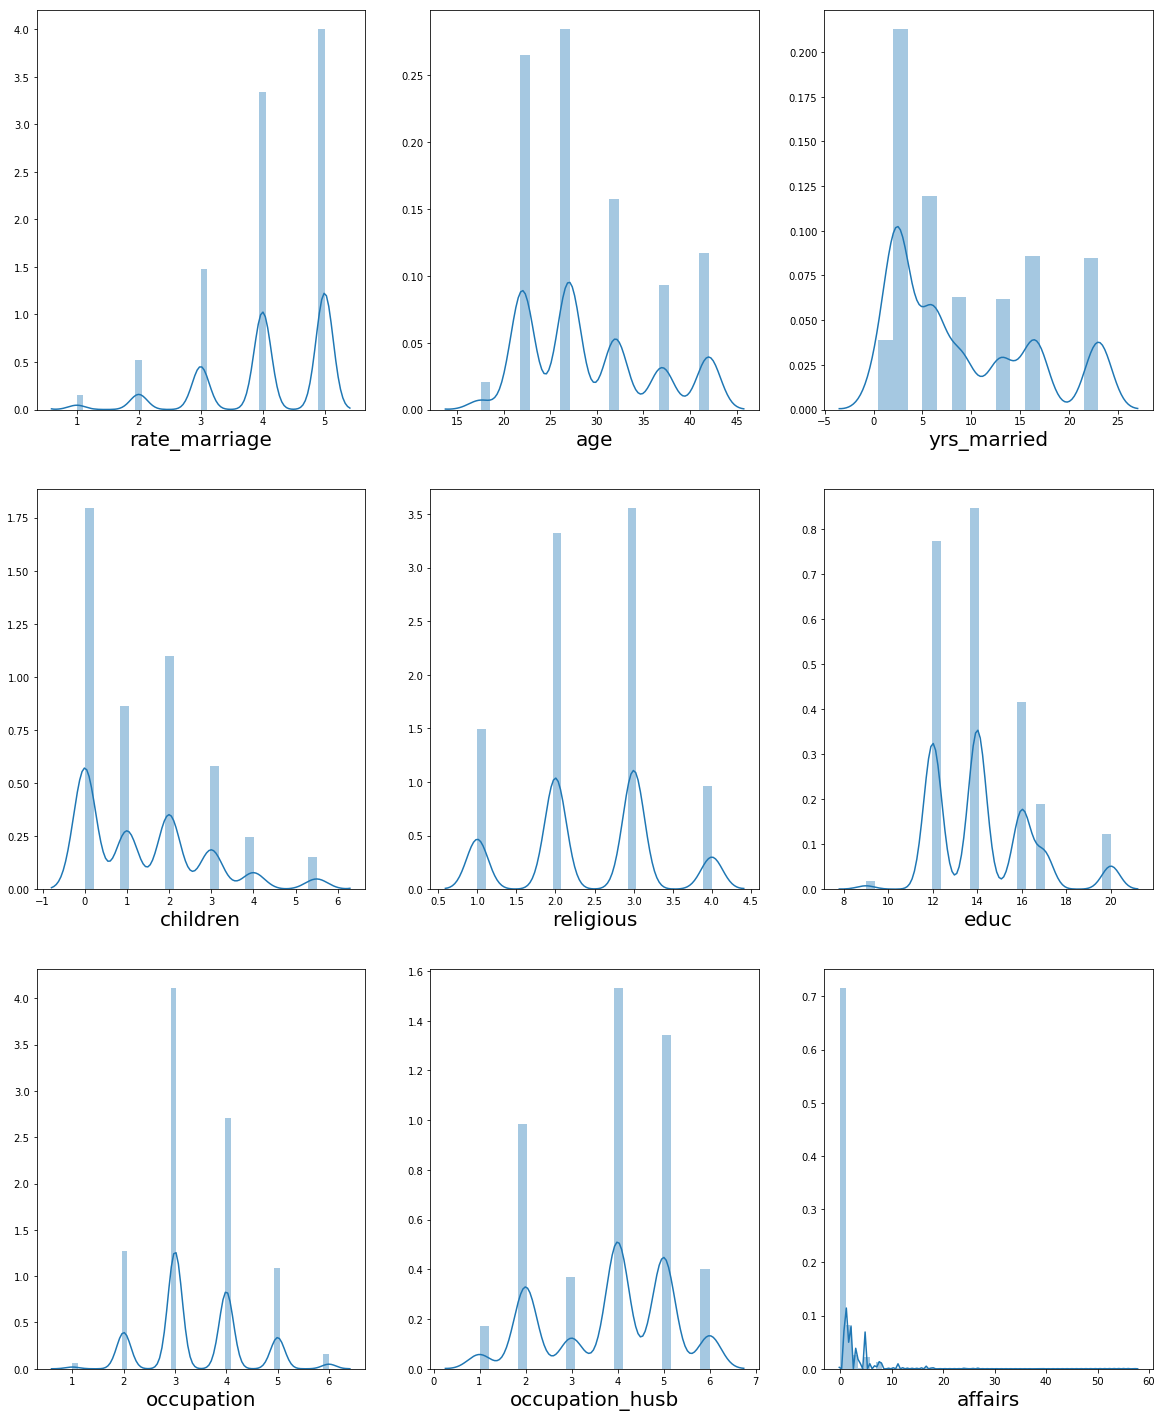

In [47]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dta[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [48]:
dta['children'] = dta['children'].replace(0,dta['children'].mean())

In [50]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")



In [67]:
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,3.000000,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,3.000000,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,1.396874,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,4.000000,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,1.000000,1.0,14.0


In [53]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [62]:
y, X = dmatrices('affair ~ rate_marriage + age + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")



In [74]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [76]:
y = np.ravel(y)

In [78]:
X = X.drop(columns = ['occ_4'])

In [81]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [95]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

C:\Users\PA20122246\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,NaN,Intercept
1,1.575105,occ_2
2,1.875896,occ_3
3,1.348053,occ_5
4,1.098352,occ_6
5,1.292987,occ_husb_2
6,1.134875,occ_husb_3
7,1.322801,occ_husb_5
8,1.227017,occ_husb_6
9,1.033153,rate_marriage


In [87]:
X

,Intercept,occ_2,occ_3,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_5,occ_husb_6,rate_marriage,age,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,3.000000,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,27.0,3.000000,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,1.396874,1.0,16.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,4.000000,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,27.0,1.000000,1.0,14.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,27.0,1.396874,2.0,14.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,37.0,5.500000,2.0,12.0
7,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,37.0,5.500000,2.0,12.0
8,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,22.0,1.396874,2.0,12.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,27.0,1.396874,1.0,16.0


In [91]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [90]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

C:\Users\PA20122246\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,NaN,Intercept
1,1.575105,occ_2
2,1.875896,occ_3
3,1.348053,occ_5
4,1.098352,occ_6
5,1.292987,occ_husb_2
6,1.134875,occ_husb_3
7,1.322801,occ_husb_5
8,1.227017,occ_husb_6
9,1.033153,rate_marriage


In [96]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [98]:
log_reg = LogisticRegression()

In [99]:
log_reg.fit(x_train,y_train)

C:\Users\PA20122246\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [100]:
y_pred = log_reg.predict(x_test)

In [101]:
y_pred

array([0., 0., 0., ..., 1., 0., 1.])

In [102]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7141959798994975

In [103]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[979,  90],
       [365, 158]], dtype=int64)

In [104]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [105]:
true_positive

979

In [106]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7141959798994975

In [107]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7284226190476191

In [109]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9158091674462114

In [110]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8114380439287195

In [111]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6089562089621114